# Titanic Tutorial Copy 3

Previously I copied a blog post about titanic tutorial. It was titanic tutorial copy 1 and 2. Now I'm going to copy a kaggle notebook [EDA to Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook) by Ashwini Swain

> 삶은 때떄로 잔혹한 유머감각을 보여준다. 최악의 상황에서 항상 원했던 것을 던져주는 것으로  
-Lisa Kleypas  

도입부에서 글쓴이는 타이타닉 사고의 의미 등을 설명하다가 upvote를 해주면 자신이 의욕을 얻을 수 있을 것 같다고 한다. 별 감흥이 느껴지지 않는다. Kaggle에서는 upvote를 직접적으로 요청하는 것이 금지돼 있지 않나 하는 생각이 먼저 들었다.

## 이 노트북의 내용
1. 탐험적 데이터 분석 (EDA)
- Feature 분석
- 복수의 feature 사이에서 관계와 경향 분석
2. Feature 다듬기, 데이터 정리
- 'Adding any few features'?
- 쓸모없는 feature 제거
- 모델링에 적당한 모양으로 feature 전환
3. 예측 모델
- 기본적인 알고리즘 실행
- 상호 대조
- 앙상블을 통한 분석
- 주요 feature 추출

# Part1: 탐험적 데이터 분석
먼저 기본적인 라이브러리를 import하고 초기설정을 조금 합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #style similar to 'fivethirtyeight.com'
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

```python
plt.style.use('fivethirtyeight')
```
matplotlib.pyplot의 style 설정값으로 동명의 사이트와 같은 스타일이라고 합니다. 이외에는 이전에 베낀 블로그 글과 크게 다르지 않습니다.

In [2]:
data = pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터를 불러오기 위해서는 competition에 들어가서 notebook을 생성하거나 notebook에서 add data를 통해 titanic data를 불러와야 합니다. 후자의 방법으로 해서 그런지 directory가 달라졌습니다.

In [3]:
 data.isnull().sum() #check null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

pandas dataframe의 isnull() 메소드는 각 feature(혹은 column)의 값들을 각각 null값인지 판단해서 bool값으로 바꿔서 반환하고, sum()은 그것들을 합쳐줍니다.  
 Age, Cabin, Embarked에 null값이 있습니다.

# 얼마나 많이 살아남았나?
먼저 예측할 대상(target label등으로 불립니다)인 생존 여부에 대해 살펴봅니다.

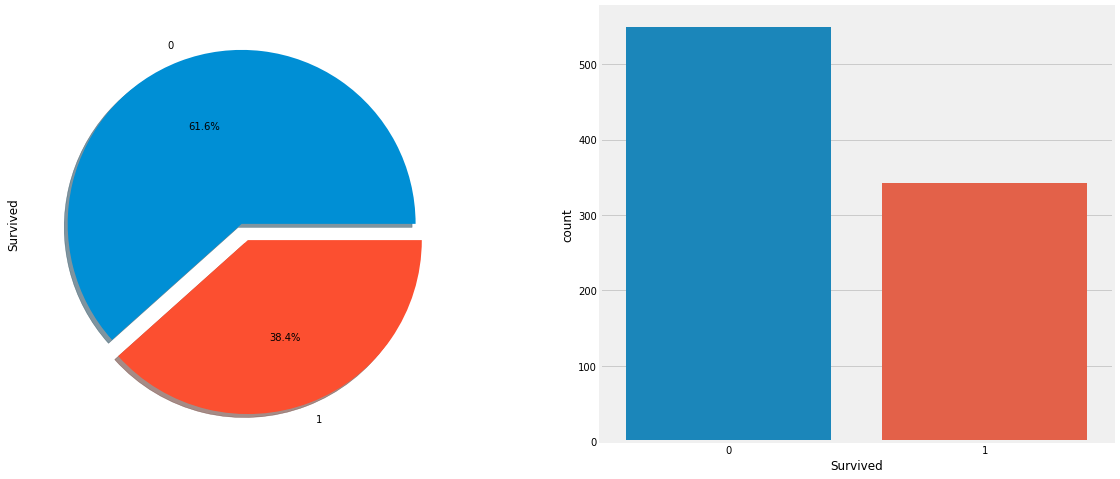

In [4]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
sns.countplot('Survived',data = data,ax=ax[1])
plt.show()

In [5]:
#help(pd.DataFrame.plot)
#help(pd.Series.plot.pie)

plot.pie() 메소드의 explode나 autopc에 대해 더 자세히 알아보려고 했지만 별로 찾지 못했습니다. 생존률은 38.4%로 상당히 낮았습니다. 이제 각 feature들을 분석학고 생존율을 봅시다.

# Feature의 종류

## 분류가능 feature (Categorical Feature)
둘 혹은 그 이상의 카테고리로 분류됩니다. 성별이 대표적이고 정렬하거나 순서를 붙일 수 없습니다. 'Nominal Variables'라고도 불립니다. 여기서는 Sex, Embarked feature가 그렇습니다.

## 순서 있는 feature (Ordinal Feature)
분류 가능 feature와 유사하지만 순서가 있습니다. 여기서는 PClass가 있습니다.

## 연속적인 feature
두 점 사이의 어떤 값이라도 될 수 있는 feature라고 합니다. 두 점은 최소값과 최대값입니다. 여기서는 'Age'가 그에 해당합니다.

# Analysing the Feature
## Sex->Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count() #groupby returns dataframe'groupby' object, similar to the DF but have some useful method

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

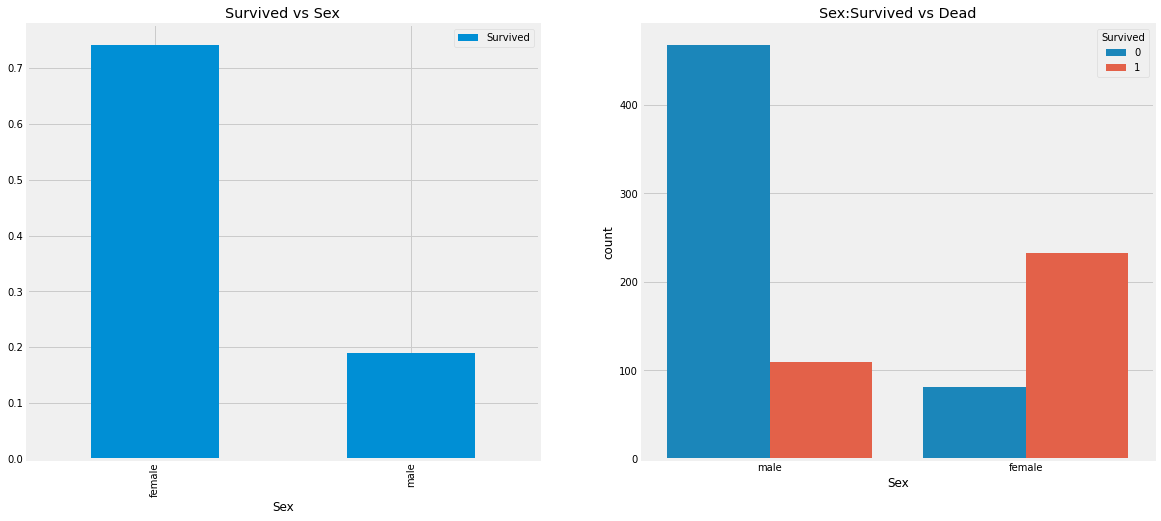

In [7]:
f, ax =plt. subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

성별과 생존률의 관계를 기본적으로 살펴보았는데, 여성이 훨씬 적었는데도 훨씬 많이 살아남았다는 결론이 나왔습니다. 생존률로 보면 그 차이가 극명하여 이 feature는 아주 중요할 예정입니다.

## Pclass -> Ordinal Feature
다음은 Pclass에 대해 살펴봅니다.

In [8]:
pd.crosstab(data.Pclass,data.Survived #between two categorical/ordinal feature, crosstab shows the number of passengers belongs to combined category
           ,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


분류 자료 두 개를 놓으면 각각의 분류 유형 수를 곱한 것 만큼의 경우의 수(혹은 tuple)를 가지고 새로운 카테고리를 설정할 수 있습니다. crosstab은 이런 합쳐진 카테고리들에 속한 데이터를 보여줍니다.

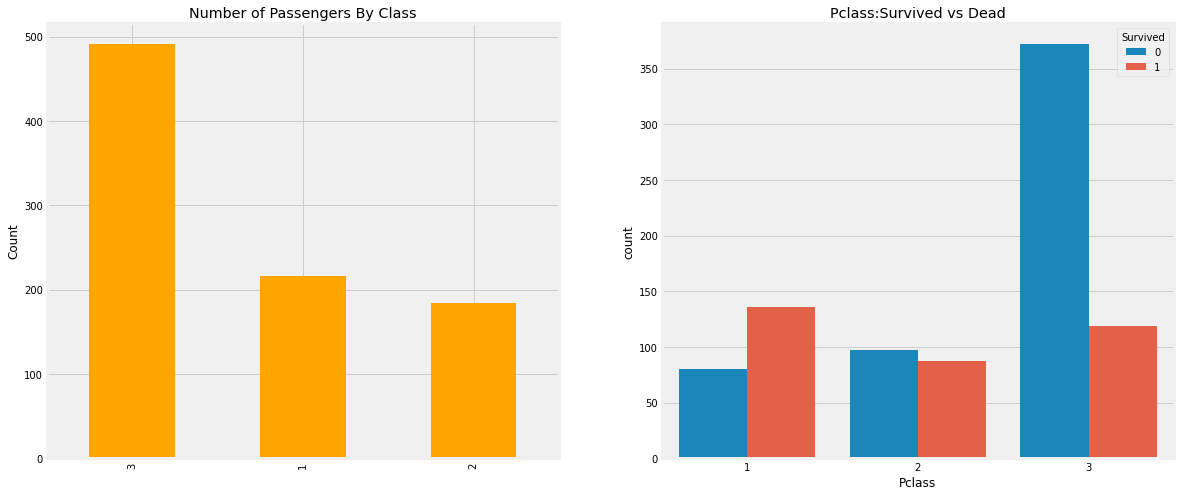

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['Orange'], ax=ax[0])
ax[0].set_title('Number of Passengers By Class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

제일 비싼 1등실 승객들의 생존률이 높았습니다. 구출 우선순위로 설정되었다고 합니다. 확률로 보면 1등 선실부터 63%, 48%, 25%로 급격히 감소합니다.
이번에는 Sex, Pclass, 생존여부를 한번에 crosstab으로 살펴봅니다.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

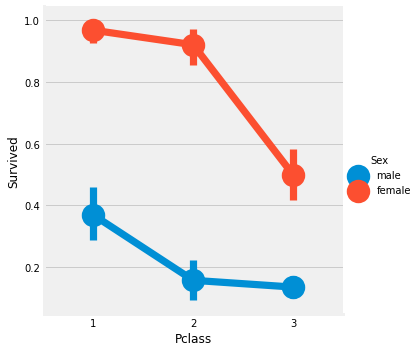

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Factor plot에서 Pclass의 영향을 포함해도 여성의 생존률이 더 높게 나타남을 확인합니다. 1등실 남성 승객의 생존률도 3등실 여성 승객에 비해 낮습니다만 오차범위 이내이기는 하네요. crosstab과 factor plot은 사실 거의 같은 데이터입니다. 

## Age -> Continuous Feature
이번에는 Age 속성에 대해 알아보겠습니다. 이건 연속적인 속성입니다. 연령 범위에 대해 잠깐 살펴봅니다.
```python
print(data['Age'].max(),data['Age'].min(),data['Age'].mean())
```
그 결과 최대 80, 최소 0.42, 평균 29.699...가 나왔습니다. 다음으로는 violin chart를 이용해 연령분포에 따른 생존자의 순을 살펴봅니다. 그런데 앞에서 중요하다고 했던 Pclass, Sex에 따라 나눠서 봅시다.

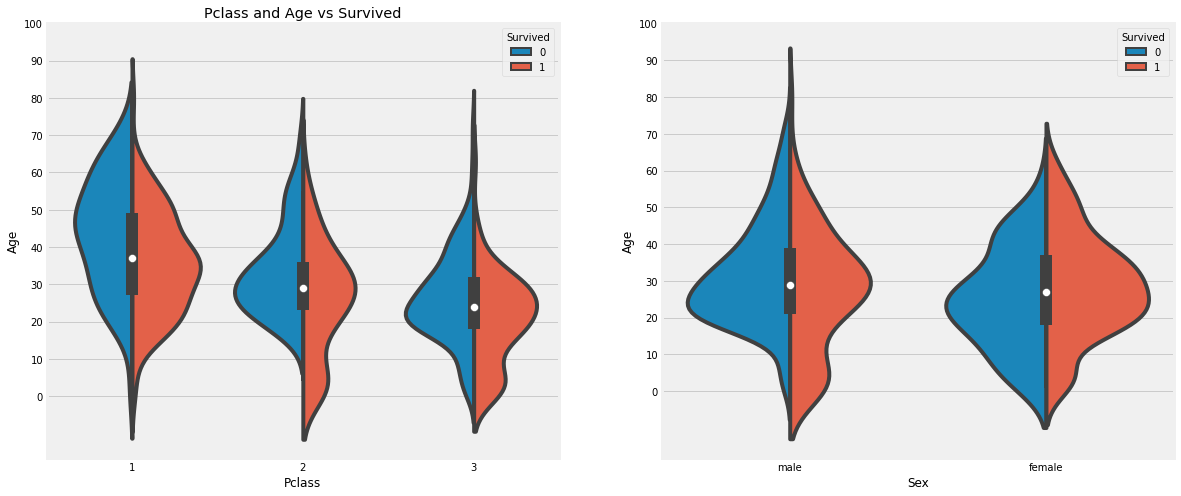

In [12]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass",'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_yticks(range(0,110,10))
plt.show()

### 관찰 결과
- 3등실 승객으로 갈수록 10세 이하 어린이가 많았습니다. 아이들은 생존율이 낮았던 3등실에서도 많이 살아남았습니다.
- 1등실 승객 20세~50세의 생존율이 높습니다. 여성의 경우 더 높습니다.
- 남성의 경우 연령이 증가할수록 생존율이 줄었습니다

Q나)이 경우 왜 확률을 보여주지 않고 이 바이올린 차트에서 따지는지 궁금하네요. 자료값이 많은 구간은 괜찮지만 적은 곳은 비교하기가 힘듭니다.

### 나이의 null값 채워넣기
177 null value가 있는데 우리는 그냥 평균값을 줘버리기 보다 승객이 어떤 연령 구간에 속하는지 찾아보고 싶습니다. 여기에서 'Name' 속성을 살펴보도록 합니다. 여기에는 salutation (미스터, 미스, 미세스 같은 것들. Initial과 거의 같은 의미입니다.)이 들어있고 그것의 평균을 취해봅시다.

먼저 'Name' 속성에서 'Initial' 속성을 새로 추출합니다.

In [13]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #extraction of salutation using its format

str.extract method에 들어간 것은 'Regular Expression'이라고 불리는데, 다음 문서를 참고하면 좋겠네요.  
[Regular expression operations - python.org](https://docs.python.org/3/library/re.html)  
일단 여기서 쓰인 것은 알파벳이 나오다가 마침표로 끝나는 문자열을 추출한다는 것입니다.

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


오타/오기/오인된 이니셜이 있다면서 Mlle나 Mme 등을 Miss로 고치는 등의 수정작업을 합니다. 그런데 Dr.에 여성이 한 명 있음에도 불구하고 Mrs로 수정해버리네요. 제 생각엔 Doctor같기 때문에 그렇게 고치지 않겠습니다.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms'],'Miss',inplace=True)
data['Initial'].replace(['Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Mr', 'Mrs', 'Mrs', 'Other', 'Other','Other','Mr','Mr','Mr'], inplace=True)


In [16]:
print(data.groupby('Initial')['Age'].count())
print(data.groupby('Initial')['Age'].mean())

Initial
Dr          6
Master     36
Miss      150
Mr        403
Mrs       110
Other       9
Name: Age, dtype: int64
Initial
Dr        42.000000
Master     4.574167
Miss      21.860000
Mr        32.601737
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


NaN values에 같은 initial을 가진 사람의 나이 평균을 대입합니다. loc메소드를 사용합니다. 간단히 dictionary를 만들어서 사용하겠습니다.

In [17]:
initial_to_age={'Dr':42, 'Master':4.6, 'Miss': 21.9, 'Mr':32.6, 'Mrs': 36.0, 'Other':45.9}
for init in initial_to_age:
    data.loc[(data.Age.isnull())&(data.Initial==init),'Age']=initial_to_age[init]

In [18]:
data.Age.isnull().any()

False

isnull()은 시리즈의 값이 null인지 판단해 bool값이 저장된 같은 size의 시리즈를 반환하고, any()는 시리즈의 값들 중 하나라도 True가 있으면 True를 반환합니다. 즉 나이의 null값이 다 없어졌는지 확인한 것입니다. Age도 없고 Initial도 없는 자료는 다행히 없었던 것 같습니다.

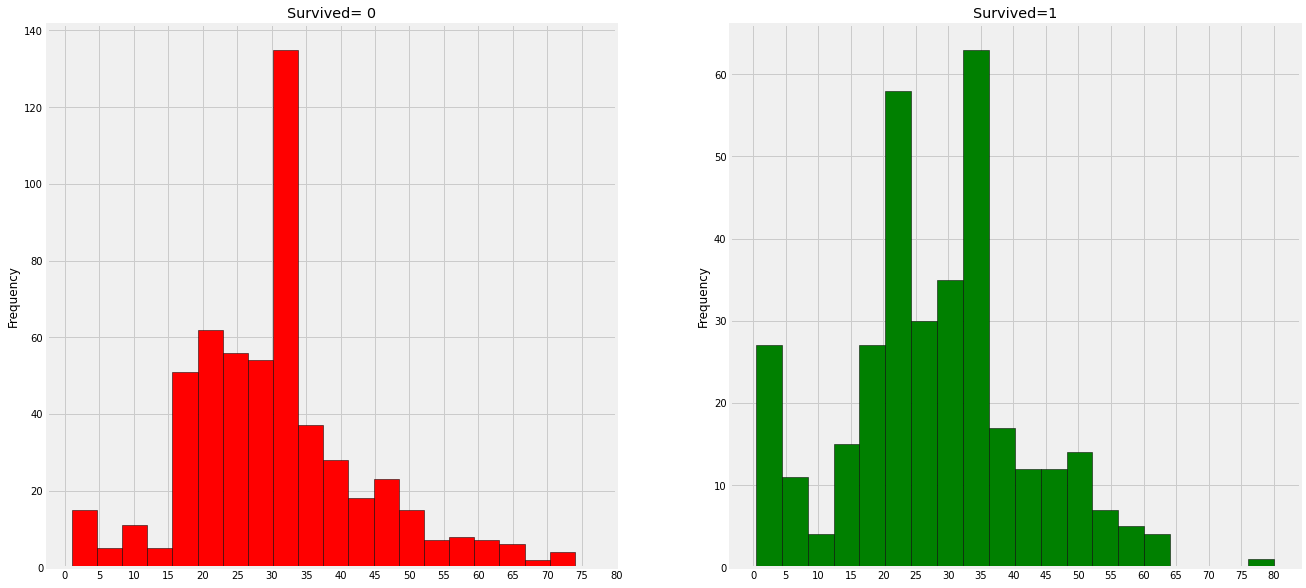

In [19]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
ax[1].set_xticks(x1) #use x1 again cause it's same
plt.show()

### 분석
- 영유아들은 많이 살았습니다.
- 최고령자는 생존했습니다.
- 30세~40세 그룹에서 사망자가 가장 많았습니다.

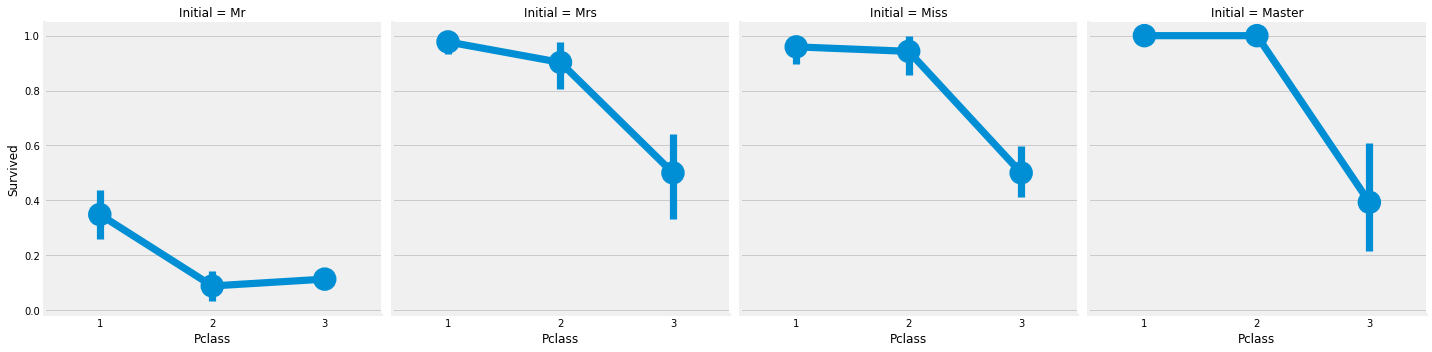

In [20]:
sns.factorplot('Pclass','Survived',col='Initial',data=data[(data['Initial']!='Dr')&(data['Initial']!='Other')])
plt.show()

닥터와 other는 자료 숫자가 너무 적어서 배제하였습니다.
표 등급과 관계없이 아이와 여성이 많이 생존했습니다.

## Embarked -> Categorical Value
이번에는 승선 항구를 살펴봅니다.

In [21]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 승선 항구에 따른 생존률 변화

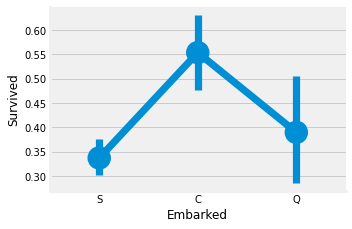

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() #gcf() get the current figure. make new one if stack is empty
fig.set_size_inches(5,3)
plt.show()

항구 C의 생존률이 0.55 정도로 가장 높고 S가 0.34 정도로 가장 낮았습니다.

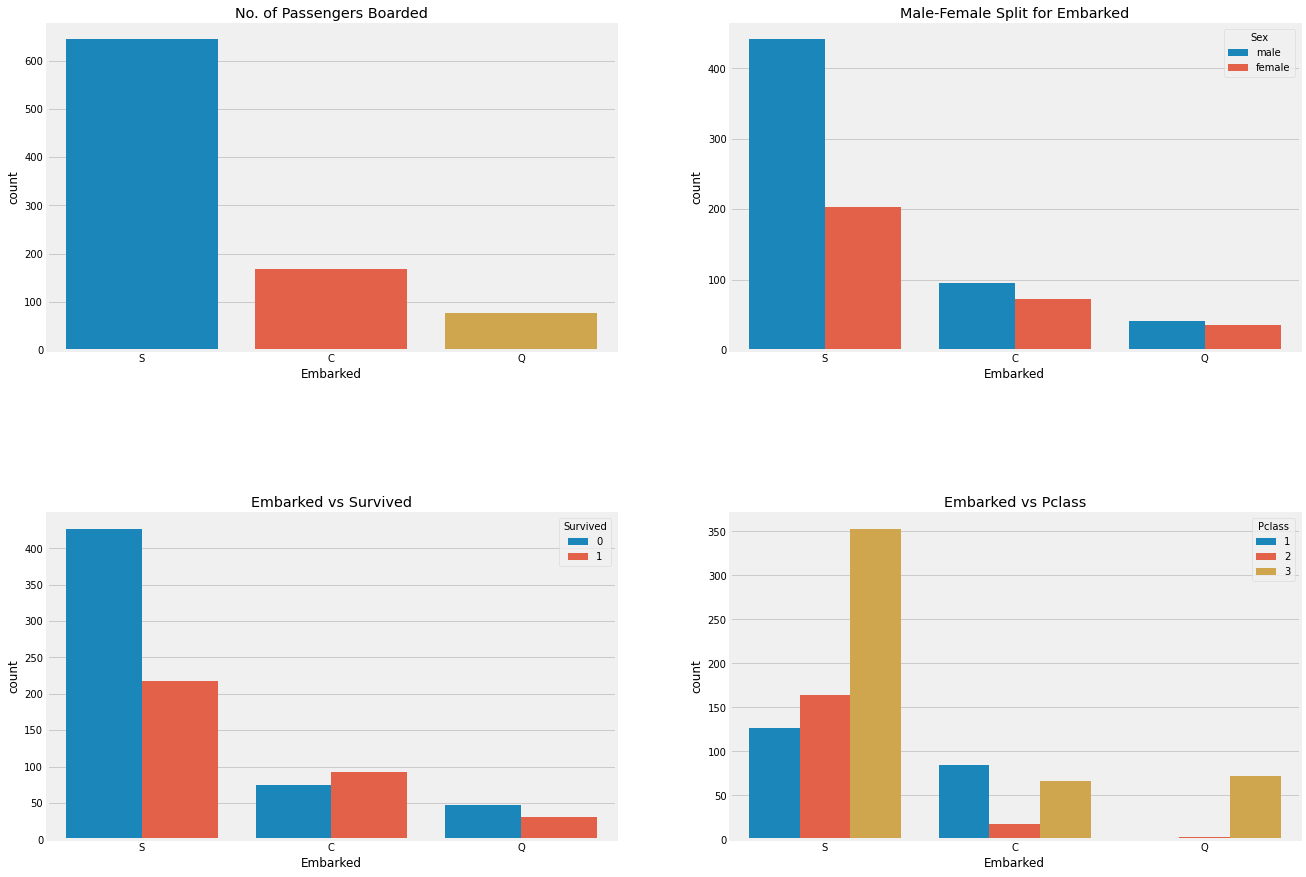

In [23]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0][0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1][0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1][1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 분석
- S항구에서 가장 많은 승객이 탑승했으며 주로 3등실 승객이었다.
- C항구 승객은 많이 살아남은 것처럼 보이는데 1, 2등실 승객이 많아서 그랬던 것일 수도 있다.
- S항구에서 1등실 승객이 가장 많이 탔는데 생존률이 낮다. 하지만 이건 3등실 승객이 그보다 훨씬 많이 탑승해서 그런 것이다.
- Q항구에는 대부분 3등실 승객이 탑승했다. (95%가량)
Q나) 3등실 승객이라 많이 죽은 것인지 S항구에서 타서 많이 죽은 것인지 인과관계를 함부로 단정짓는 것은 위험한 것 같다. 3등실 승객의 대부분이 S항구에서 승선했기 때문에 구분하기 쉽지 않다.

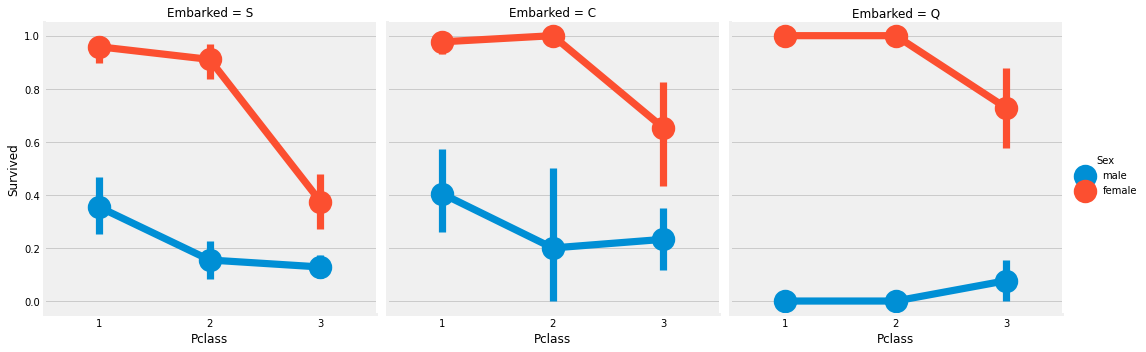

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### 분석결과
- 1,2선실 승객 여성은 거의 살아남았다.
- Q항구 승선자는 특히 남자들의 경우 생존율이 가장 낮았다.
- S항구 승선자이면서 3등실 승객의 생존율은 굉장히 낮았다.

## 승선항구 빈 칸 채워넣기
가장 많은 승객이 S항구에서 승선했으므로 그냥 S항구로 채웁니다. 이런 경우 loc 메소드 등을 써도 되지만 fillna method를 쓰면 간단하게 null값을 채울 수 있습니다.

In [25]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

## SibSp -> 불연속 속성
이 속성은 가족 멤버의 수를 보여줍니다.
Sibling(형제, 자매, 의형제, 의자매), Spouse(배우자) 둘을 합친 것 같습니다.

In [26]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


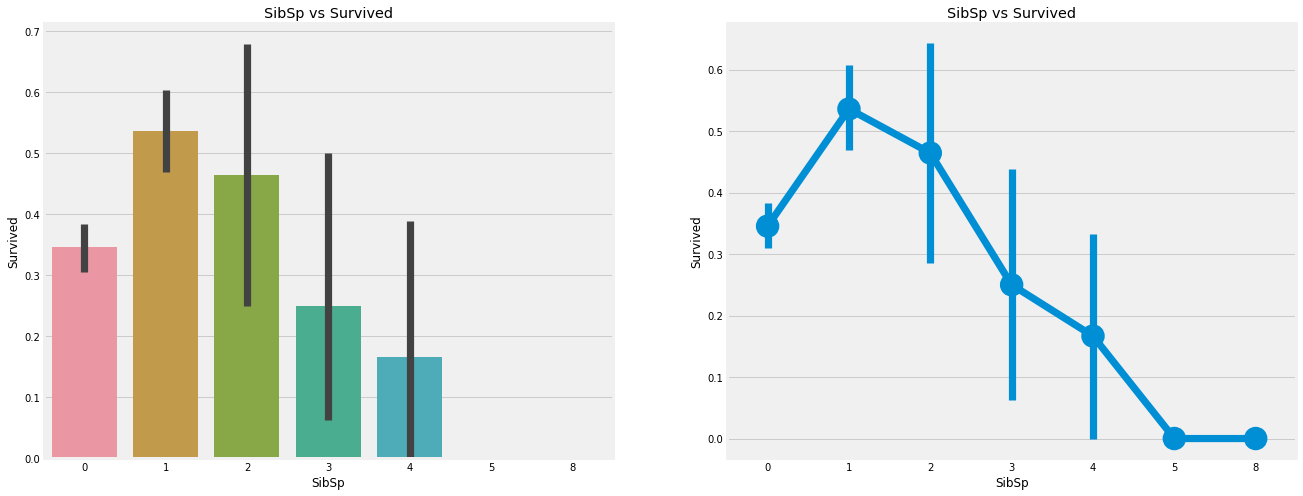

In [27]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2) #something is wrong. no fig2 if I include this line
plt.show()

In [28]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 분석
막대그래프와 factor plot에서 SibSp가 1인, 즉 혼자 탄 승객은 34.5%의 생존율이 나왔고 SibSp가 증가할수록 생존율이 조금 줄었다. 신경쓸 사람이 많으면 생존이 어려워진다고 설명하면 납득이 간다. SibSp 4-6, 즉 5-8인과 승선한 이들은 다 사망했는데 전부 3등실 승객이었기 때문에 그런 것 같다. 

## Parch
 배우자 및 부모자식 수이다.

In [29]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


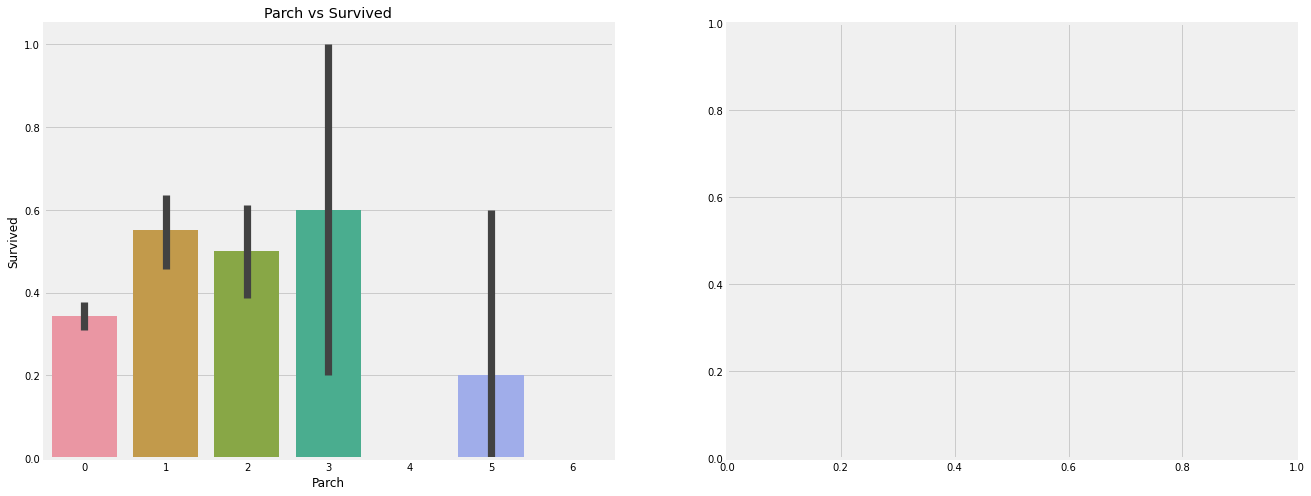

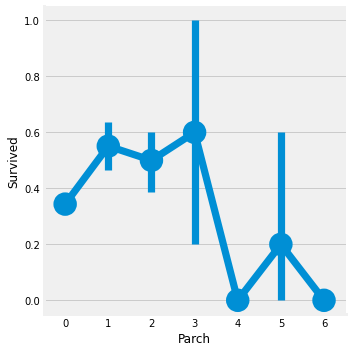

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
plt.show()
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()
#Because of weired output, I used netx code.

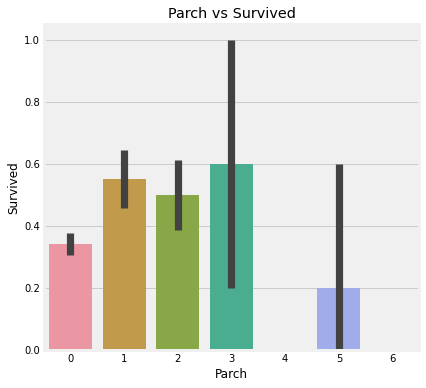

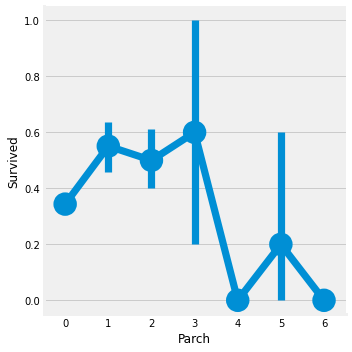

In [31]:
f, ax = plt.subplots(1, 1, figsize=(6,6))
sns.barplot('Parch','Survived',data=data,ax=ax)
ax.set_title('Parch vs Survived')
plt.show()
sns.factorplot('Parch','Survived',data=data,ax=ax)
ax.set_title('Parch vs Survived')
#plt.close(2)
plt.show()

### 분석

유사한 결과가 나왔는데 부모가 있는 경우 생존율이 크게 증가했다. 1-3부모가 있는 경우 생존율이 증가했고 4인 이상의 부모가 있으면 생존률이 감소했으며 혼자 있어도 살아남기 힘들었다.

Q나) 이 속성은 부모 자식 합한 것 아니었나? 그리고 자료 수가 적은데 경향성을 따지기는 힘들지 않을까.

## 운임 -> 연속적 속성

In [32]:
print('max, min, mean is',data['Fare'].max(),data['Fare'].min(),data['Fare'].mean())

max, min, mean is 512.3292 0.0 32.204207968574636


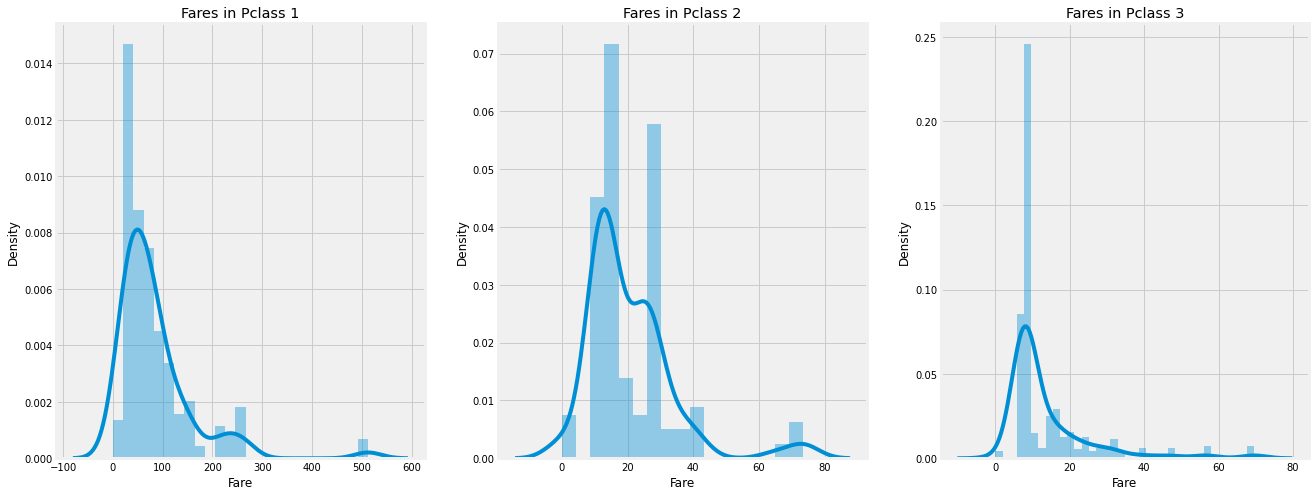

In [33]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

1등실 운임은 넓게 퍼져 있었고 등급이 내려갈수록 분포가 좁아졌다. 연속적인 값이기 때문에 구간으로 나누겠다.

## 속성 살펴보기 결록
성별 : 여성의 생존율이 높았다.
티켓 클래스 : 비싼 표 가진 사람이 많이 살았다.
연령 : 10세 이하가 많이 살았고 15~35세는 많이 죽었다.
항구 : 흥미로운 속성으로 S에서 1클래스가 많았는데도 불구하고 C의 생존율이 높았다. Q는 다 3클래스 표였다. 
Q)이게 맞나?
Parch+SibSp: 1-2SibSp나 1-3Parch를 가질 떄 생존율이 좋았다.

In [34]:
## Correlation Between The Features

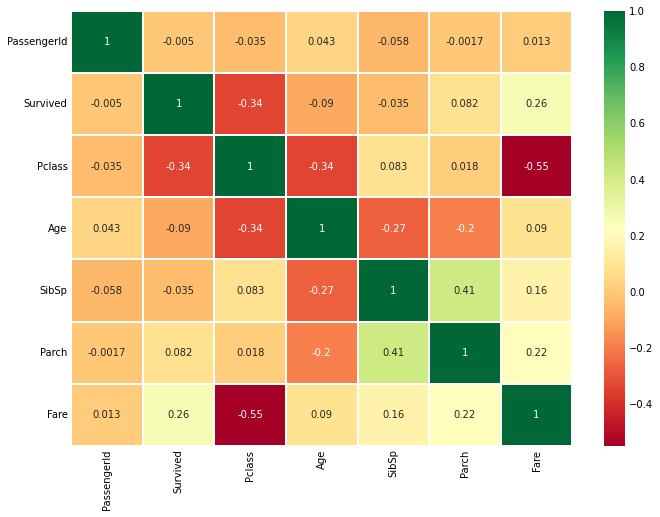

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석
먼저 correlation이 뭔지 알아봅니다. 양수라면 정비례 관계. 음수라면 반비례 관계인데 1 혹은 -1에 가까울수록 그 관계가 강한 겁니다. 1 혹은 -1에 너무 가까우면 MultiColinearity라고 하는데 거의 같은 정보를 가지고 있다는 뜻이고 하나는 제거해도 괜찮을 수 있습니다.
그렇지만 위에서는 가장 높은 correlation이 0.41으로 제거할 속성은 보이지 않습니다. 

# Part2: 속성 다듬기와 데이터 청소
Feature Engineering(속성 다듬기)
모든 속성이 중요하지는 않은 데이터셋에서 불필요한 것들을 제거하거나 다른 속성에서 추출하는 등 새로운 속성을 추가하는 경우가 이에 속합니다. 예측 모델링에 적합한 형태로 바꾸기도 합니다.

## Age_band
연속값은 기계학습에서 문제가 있기 떄문에 categorical value(분류 값)으로 바꿔줍니다. 정규화를 할 수도 있고 Binning을 할 수도 있습니다. binning을 할건데 그것은 그룹을 나눈 다음에 하나의 값을 부여한다는 겁니다.
16세를 기준으로 나누겠습니다.

In [36]:
data['Age_band']=0
for i in range(5): #use for loop for efficiency
    data.loc[(data['Age']>16*i)&(data['Age']<=16*(i+1)),'Age_band']=i
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#to_frame shows table-like output in some frame

,Age_band
1,382
2,325
0,104
3,69
4,11


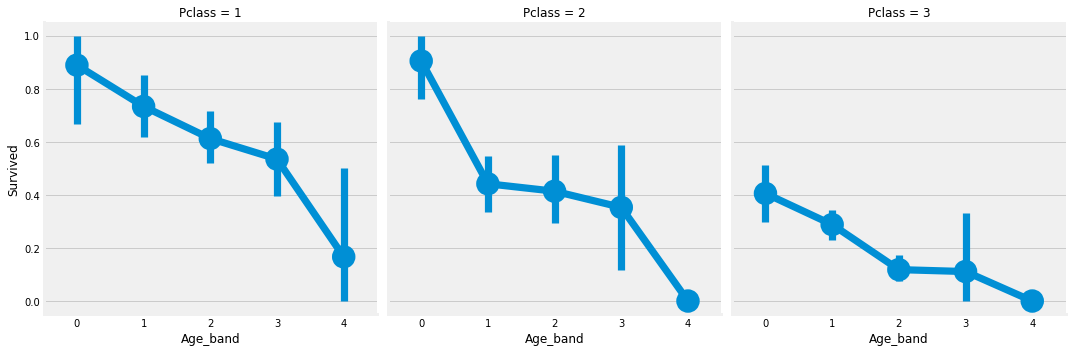

In [38]:
sns.factorplot('Age_band','Survived',data=data, col='Pclass')
plt.show()

Pclass와 관계없이 생존율은 나이에 반비례하였습니다.

## 가족 크기

Family_size와 Alone이라는 속성을 추가하겠습니다. Parch와 SibSp에서 구해지는 속성으로, 이것을 합하면 혼자 승선했는지의 여부도 알 수 있습니다.

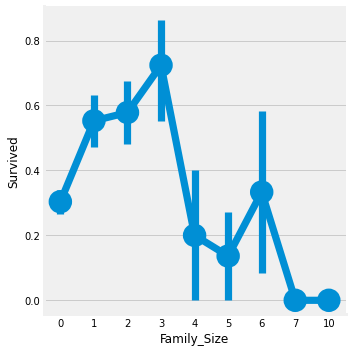

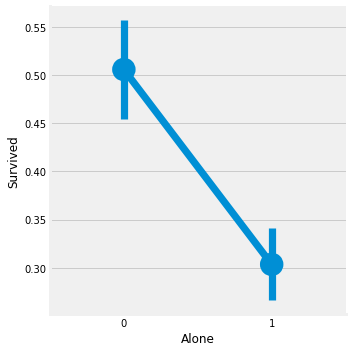

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0) 
plt.close(1)#it was originaly close(2), close(3). I don't know where to start solve this,
plt.show()

혼자이면 생존률이 매우 감소했고 가족크기가 4 이상이었을 때도 그랬습니다. 중요한 것 같으니 더 살펴봅시다.

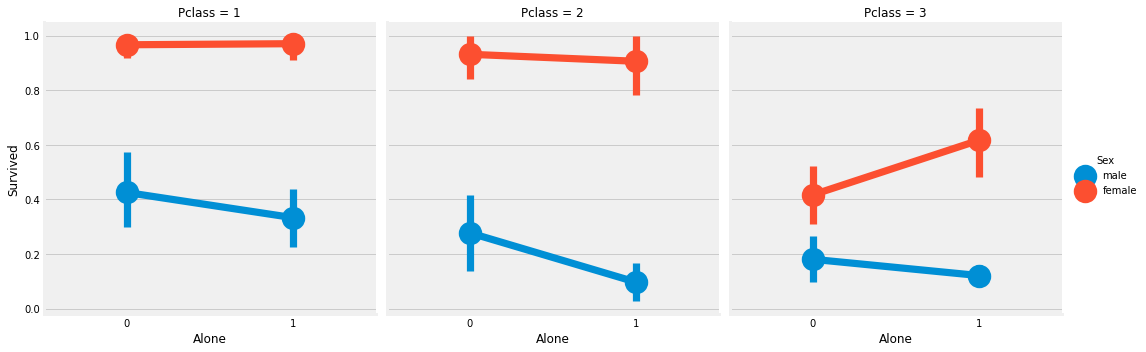

In [40]:
sns.factorplot('Alone','Survived',data=data, hue='Sex', col='Pclass')
plt.show()

주요 속성이었던 Sex, Pclass와 별개로 혼자이면 생존율이 감소했습니다. 하지만 3등실 여성 중에서는 가족이 없는 경우의 생존율이 컸습니다.

## Fare Range 
운임 역시 연속적 속성이므로 ordinal value로 바꿉니다. padas.qcut 메소드를 사용하겠습니다. 이걸 사용하면 같은 숫자의 자료를 가지도록 나눌 수 있습니다.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의된 바와 같이 운임과 생존율도 비례하였습니다. 이제 Fare_Range를 Age_Band처럼 구간으로 바꿉니다.

In [42]:
Fare_Ranges=[-0.001,7.91,14.454,31.0,512.329]
data['Fare_cat']=0
for i in range(4):
    data.loc[(data['Fare']>Fare_Ranges[i])&(data['Fare']<=Fare_Ranges[i+1]),'Fare_cat']=i

In [43]:
data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,1,0,1,"(14.454, 31.0]",2
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,1,0,1,"(-0.001, 7.91]",0


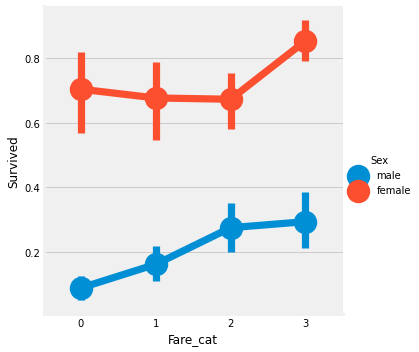

In [44]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

운임에 따라 생존율이 증가하는 것도 경향성이 뚜렸했습니다. 성별과 마찬가지로 중요 속성이 될 것 같습니다.

## 문자열을 수로 전환하기
Sex, Embarked 등을 숫자로 바꾸어줍니다. 이 과정에서 Dr와 Other를 합치겠습니다. 평균 연령도 비슷하고 Dr가 지식층이다 같은 것을 이용하기에는 수가 너무 작습니다.

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other','Dr'],[0,1,2,3,4,4], inplace=True)

## 불필요한 속성들 제거

__Name__ 은 추출한 Initial 이외에 사용하지 않습니다.  
__Age__ 는 Age_band가 대체했습니다.  
__Ticket__ 의 경우 딱히 정보를 찾지 못해 배제합니다.  
__Fare__ 는 Fare_cat이 대체했습니다.  
__Cabin__ 은 NaN 값이 너무 많고 여러 값을 가진 승객이 많습니다.  
__Fare_Range__ fare_cat이 대체합니다.  
__PAssengerId__ 는 분류가 안됩니다.  

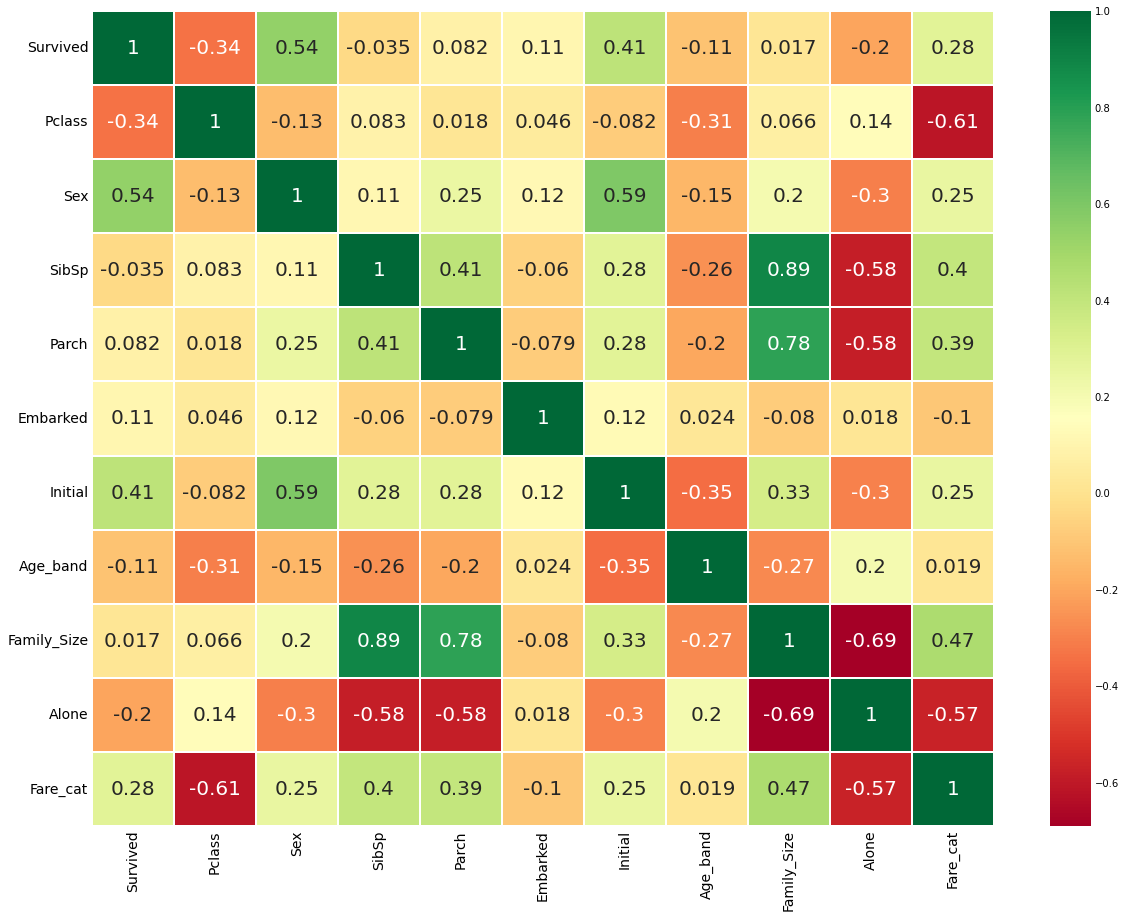

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3 모델에서 예측 해보기

일부 식견을 얻긴 했지만 어떤 승객의 생존에 대해 예상할 수는 없습니다. 이제 분류 알고리듬을 써서 예측 해봅시다. 여기서는 다음과 같은 알고리즘을 사용할 겁니다.
1. 로지스틱 회귀
2. support vector machines(SVM, Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. 선택나무
7. 로지스틱 회귀 (왜 반복됐을까요?)

필요한 모든 기계학습 패키지를 불러옵니다.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [48]:
train, test=train_test_split(data,test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]] #first column is 'target label', so divided like this.
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [49]:
#rbf-SVM
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [50]:
#Linear-SVM
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8059701492537313


In [51]:
#Decision Tree

model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8171641791044776


In [52]:
#K-Nearest Neighbors (KNN)
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('accuray for KNN is ',metrics.accuracy_score(prediction5,test_Y))

accuray for KNN is  0.8171641791044776


KNN 모델의 정확도는 n_neighbors 속성을 변경하면 바뀔겁니다. 기본값은 5인데 이에 따라 어떻게 변화하나 봅시다.

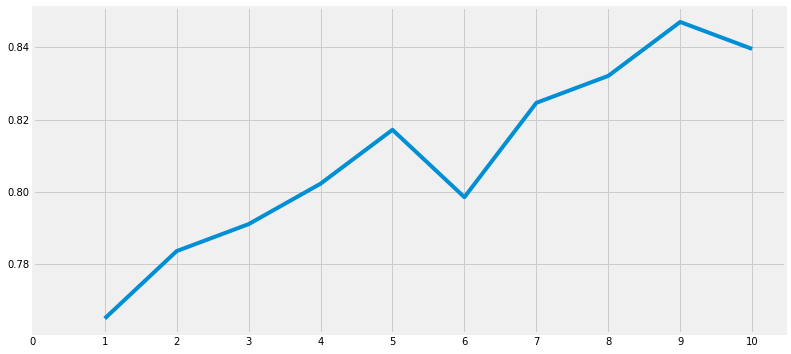

[0.76492537 0.78358209 0.79104478 0.80223881 0.81716418 0.79850746
 0.82462687 0.83208955 0.84701493 0.83955224] 
for different n. maximum was  0.8470149253731343


In [53]:
a_index = list(range(1,11))
a=pd.Series()
x=list(range(11))
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print(a.values, '\nfor different n. maximum was ',a.values.max())

In [54]:
#Gaussian Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('Accuracy of NaiveBayes is ',metrics.accuracy_score(prediction6, test_Y))

Accuracy of NaiveBayes is  0.8134328358208955


In [55]:
#Random Forests

model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('Accuracy of Random Forest is ',metrics.accuracy_score(prediction7,test_Y))

Accuracy of Random Forest is  0.8246268656716418


모델의 정확도는 분류 알고리즘의 견고함을 알려주는 유일한 요소가 아닙니다. 분류 모델이 90%의 정확도를 보여주었다고 한다면 아주 좋은 정확도 같지만 새로운 데이터셋에 대해 시험했을때 같은 정확도가 나오리라는 보장은 없습니다. 각각의 자료(instance, 여기서는 승객) 중 어떤 것을 학습에 쓸지 우리가 결정하지 않습니다. 학습 - 정확도 확인 데이터가 바뀌면 정확도도 바뀔 겁니다. 이 때의 증감을 model variance라고 합니다.  
이것을 극복하기 위해 __Cross Validation__ 이 사용됩니다.

# Cross Validation
데이터가 불균형한 경우가 많습니다. 불균형하다는 것은 하나의 분류에 자료가 몰려있다거나 하다는 겁니다. 우리는 데이터셋의 instance 하나하나 그리고 전부에 대해 학습시키고 테스트해야 합니다. 그러면 평균을 취할 수 있겠습니다.

__K-Fold Cross Validation__
1. 데이터셋을 먼저 k-subsets으로 나눕니다.
2. 5개로 나누었다고 하면 1part를 테스트에 쓰고 4parts를 학습에 씁니다.
3. test part를 바꿔가며 반복해서 정확도의 평균을 얻습니다.
이렇게 특정 데이터셋에 대해 underfit되거나 overfit될 가능성을 없앱니다.

In [56]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle=True) #shuffle set to True according to the error message
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = 'accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.780112,0.053420
Radial Svm,0.826130,0.054898
Logistic Regression,0.800300,0.043278
KNN,0.810387,0.037004
Decision Tree,0.811473,0.042743
Naive Bayes,0.792459,0.052730
Random Forest,0.812609,0.042143


<AxesSubplot:>

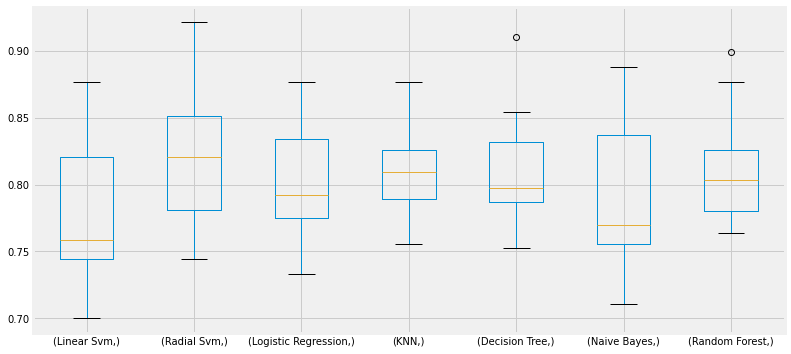

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

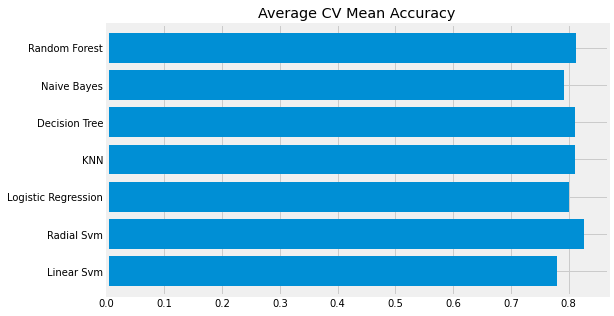

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 자료 불균형으로 오도될 수 있습니다. confusion matrix를 통해 결과를 요약해서 모델의 어디가 잘못됐는지 아니면 어떤 분류(class)가 잘못 예측하게 만들었는지 알 수 있습니다.

# Confusion Matrix

분류 모델이 분류에 성공하고 실패한 숫자를 알 수 있습니다.

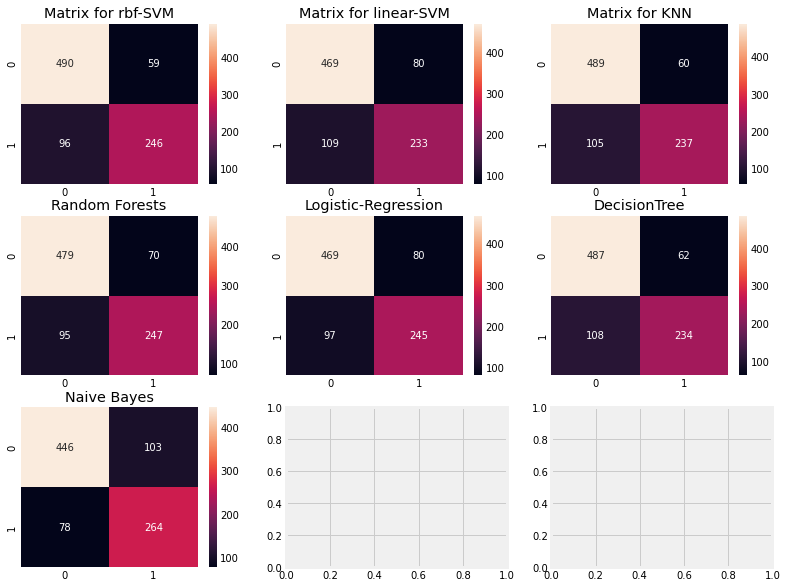

In [59]:
f, ax = plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0][0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0][1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0][2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1][0], annot=True, fmt='2.0f')
ax[1,0].set_title('Random Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1][1], annot=True, fmt='2.0f')
ax[1,1].set_title('Logistic-Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1][2], annot=True, fmt='2.0f')
ax[1,2].set_title('DecisionTree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2][0], annot=True, fmt='2.0f')
ax[2,0].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## Confusion Matrix 해석

1. rbf-SVM의 경우를 예로 들어보면 CV 정확도는 $\left({491+247}\right)/891$ 입니다.
2. Errors 58 사망자에 대해 생존했다고 잘못 판단하고, 95 생존자에 대해 사망했다고 판단했습니다. 후자의 경우가 더 많았습니다.
이런 식으로 rbf-SVM는 사망자를 잘 가려내고 NaiveBayes는 생존자를 잘 가려낸다고 할 수 있습니다.


## Hyper-Parameters 조정

기계학습은 블랙박스와 같아서 초기값을 조정하여 더 나은 학습 결과를 얻을 수 있습니다. SVM모델의 C, $\gamma$ 등이 있죠. 이들이 hyper-parameter라고 불리고 이것을 조정하는 것을 Hyper-Parameter Tuning이라고 합니다. SVM과 RandomForests에 대해 이것을 해보겠습니다.



In [60]:
#SVM
from sklearn.model_selection import GridSearchCV
c=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9, 1.]
gamma=[0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
kernel = ['rbf','linear']
hyper = {'kernel':kernel, 'C':c, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8260247316552632
SVC(C=0.4, gamma=0.3)


In [61]:
#Random Forests
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=400, random_state=0)


이렇게 두 모델에 대해서 예측 결과가 잘 나오는 hyper-parameter 값을 찾을 수 있었습니다.

# Ensembling

가능한 모든 parameter에 대한 결과를 바탕으로 특정 parameter에서의 결과를 알 수 있겠습니다.
이것은 다음과 같은 단계를 거쳐 진행됩니다.
1. Voting Classifier (분류자 투표)
2. Bagging (구걸)
3. Boosting

## Voting Classifier

간단한 기계학습 모델의 예측을 조합하는 가장 단순한 방법입니다. 하위모델의 모든 예측결과의 평균을 취합니다. 

In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF',svm.SVC(probability = True, kernel = 'rbf', C=0.5, gamma=0.1))],
                                   voting='soft').fit(train_X, train_Y)
print(ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print(cross.mean())

0.835820895522388
0.8170911360799


## Bagging
일반적인 ensemble method로 비슷한 분류알고리즘을 데이터셋의 작은 부분에 적용하고 평균을 취합니다. 평균을 취하기 때문에 편차가 감쇠합니다. Voting classifier와 달리 유사한 분류 알고리즘을 씁니다.

### Bagged KNN
Bagging은 분산이 큰 모델에서 효과가 좋습니다. Decision Tree나 Random Forest 같은 것이요. n_neigbors 값이 작은 KNN을 사용할 수 있습니다.

In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('accuracy of bagged KNN ',metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model,X,Y,cv=10, scoring='accuracy')
print('CV score is ', result.mean())

accuracy of bagged KNN  0.8246268656716418
CV score is  0.8115480649188515


## Boosting
예측을 잘 한 instance와 잘 못 한 인스턴스에 다른 가중치를 주는 방식으로 학습을 반복시킵니다.

In [64]:
##Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring= 'accuracy')
print(result.mean())

0.8260424469413234


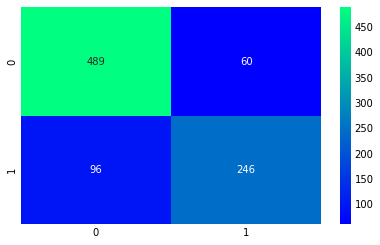

In [65]:
#confusion matrix for the best model
ada = AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True, fmt='2.0f')
plt.show()

# Feature Importance

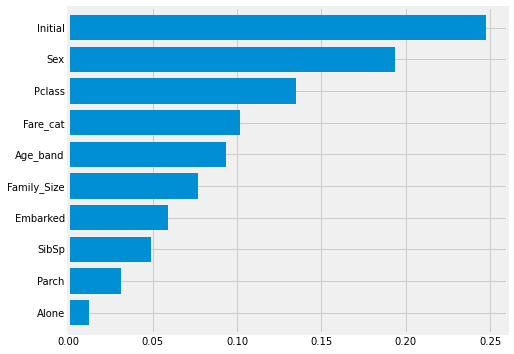

In [66]:
f, ax = plt.subplots(1,1,figsize=(7,6))
model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=.8,ax=ax)
plt.show()

## 분석

- initial, Fare_cat, Pclass, Family_size는 공통적으로 중요한 속성이었다
- Sex는 RandomForest에서만 중요한 속성이었다. Initial은 중요한 것을 봤을 때는 좀 재고할 필요가 있다.
- Pclass 와 Fare_cat의 관계는 가족 크기??가 어쩄다는 것일까

마지막으로 작자는 기계학습에 대한 식견을 얻었기를 바란다면서 소개하면서 끝낸다.